In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

In [0]:
from google.colab import files

In [5]:
upload=files.upload()

Saving data.csv to data.csv


In [0]:
data=pd.read_csv('data.csv', header=0)

In [0]:
m=0#initial start value of gradient
c=0#initial start value of y-ntercept
L=0.0001#learning ratetry playing around with the value to see which ones converge
epoch=100#define whatever number of epochs you want but mind both efficiency and accuracy issues
epoch_error_list=[]
epoch_count_list=[]
N=float(len(X))

In [0]:
Y=data['price_x1000_sh']
X=data['size_in_sq_ft']

In [0]:
def mse(N,Y,Y_hat):
  return(1/N)*sum(Y-Y_hat)**2

In [0]:
def gradient_descent_fit(X,Y,L):#main function i.e. gradient descent to learn the line of best fit
  m=0#initial start value of gradient
  c=0#initial start value of y-ntercept
  L=0.0001#learning ratetry playing around with the value to see which ones converge

  epoch_error_list=[]
  epoch_count_list=[]
  L=0.0001

  for i in range(epoch):#loop as many times as the epochs you want
    Y_hat = m*X+c
    #compute and arrest error for every iteration
    epoch_count_list=epoch_count_list[:]#trick the list to get its instace
    epoch_count_list.append(i)
    epoch_error=mse(N,Y,Y_hat)
    epoch_error_list=epoch_error_list[:]
    epoch_error_list.append(epoch_error)
    

    #minimize the error function by computing partial derivatives
    D_m=(-2/N)*sum(X*(Y-Y_hat))
    D_c=(-2/N)*sum(Y-Y_hat)
    #Apply gradient descent formular to update both m and c into new values
    m=m-(L * D_m)
    c=c-(L * D_c)
  #you can print the final m and c after all iterations are done
  print("final m is: ",m," and final c is: ",c)
  #return final predicted value of Y-dependent variable
  return Y_hat


final m is:  1.4788027175308887  and final c is:  0.03507497059521459


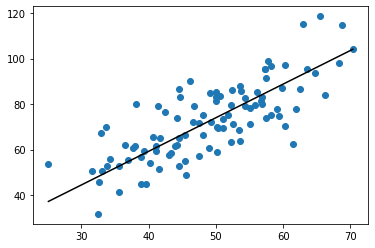

In [70]:
r=0 #m
z=0 #c
n=float(len(X)) #epochs
k=1.5 #learning rate
gradienDescent=gradient_descent_fit(X,Y,0.0001)
plt.scatter(X,Y)
plt.plot([min(X),max(X)],[min(gradienDescent),max(gradienDescent)],color='black')

In [0]:
#the ridge regressor
def ridges(X,Y,alpha,L):#the ridgeregression function
  
  w=1
  b=0
  N=float(len(X))
  for i in range(100):
    Y_hat=w*X+b
    D_w=(-2/N)*sum(X*(Y-Y_hat))-(2*alpha*w)
    D_b=(-2/N)*sum(Y-Y_hat)

    w=w-(L*D_w)
    b=b-(L*D_b)
    print('The ridge regression slope is:',w,'and it"s y intercept is:',b)
    return Y_hat

The ridge regression slope is: 1.2391780595440849 and it"s y intercept is: 0.004755341818459998


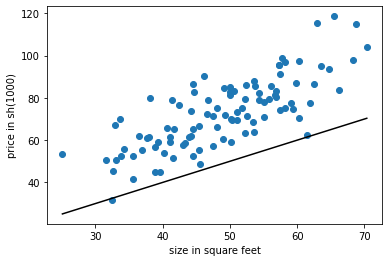

In [62]:
#alph is alpha/lamda value while Lr is the Learning Curve
alph=1.5
Lr=0.0001
ridgedValues=ridges(X,Y,alph,Lr)
plt.scatter(X,Y)
plt.ylabel('price in sh(1000)')
plt.xlabel('size in square feet')
plt.plot([min(X), max(X)], [min(ridgedValues), max(ridgedValues)], color = 'black')



In [0]:
#definig the Lasso Regressor
def lassos(X,Y,alpha=1.5,L=0.0001):
  w=1
  b=0
  N=float(len(X))
  n=int(N)
  for i in range(100):
    Y_hat=w*X+b 
    D_w=(-2/N)*sum(X*(Y-Y_hat))-alpha*(w/abs(w)) #we use the abs fuction as to get the absolute value of w 
    D_b=(-2/N)*sum(Y-Y_hat)

    w=w-(L*D_w)
    b=b-(L *D_b)

    print('Using Lasso Regression our values are ')
    print('The slope of the curve:',w,'and y intercept is:',b )
    return Y_hat

In [68]:
#alz is the alpha/lamda value while Lre is the learning curve 
#we call the Lasso Regression function
alz=1.5
Lre=0.0001
lassod=lassos(X,Y)

Using Lasso Regression our values are 
The slope of the curve: 1.239028059544085 and y intercept is: 0.004755341818459998


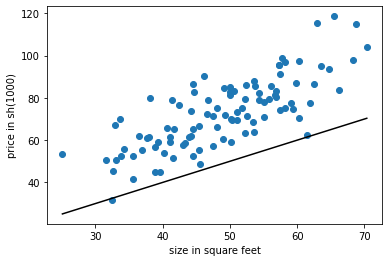

In [69]:
#PLot the scatter plot for Laso Regression
plt.scatter(X,Y)
plt.ylabel('price in sh(1000)')
plt.xlabel('size in square feet')
plt.plot([min(X), max(X)], [min(lassod), max(lassod)], color = 'black')
